In [18]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import os 
import PIL
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam

In [3]:
import pathlib
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, untar = True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

228813984/228813984 [==============================] - 63s 0us/step
/Users/leeyilin/.keras/datasets/flower_photos


In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [7]:
img_height, img_width= 180, 180
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    label_mode = "categorical",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = "validation",
    seed = 123,
    label_mode = "categorical",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


In [9]:
class_names = train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [12]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top = False, 
    input_shape = (180, 180, 3),
    pooling = "avg",
    classes = 5,
    weights = "imagenet"
)
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = "relu"))
resnet_model.add(Dense(5, activation = "softmax"))

resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
__________________________________

In [15]:
resnet_model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [16]:
epochs = 10
history = resnet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
92/92 [==============================] - 210s 2s/step - loss: 0.7789 - accuracy: 0.7612 - val_loss: 0.3437 - val_accuracy: 0.8747
Epoch 2/10
92/92 [==============================] - 193s 2s/step - loss: 0.2987 - accuracy: 0.8890 - val_loss: 0.3174 - val_accuracy: 0.8874
Epoch 3/10
92/92 [==============================] - 196s 2s/step - loss: 0.1737 - accuracy: 0.9407 - val_loss: 0.2817 - val_accuracy: 0.9028
Epoch 4/10
92/92 [==============================] - 198s 2s/step - loss: 0.1054 - accuracy: 0.9687 - val_loss: 0.3878 - val_accuracy: 0.8946
Epoch 5/10
92/92 [==============================] - 199s 2s/step - loss: 0.0599 - accuracy: 0.9867 - val_loss: 0.2770 - val_accuracy: 0.9146
Epoch 6/10
92/92 [==============================] - 193s 2s/step - loss: 0.0413 - accuracy: 0.9905 - val_loss: 0.2852 - val_accuracy: 0.9246
Epoch 7/10
92/92 [==============================] - 188s 2s/step - loss: 0.0223 - accuracy: 0.9966 - val_loss: 0.2981 - val_accuracy: 0.9155
Epoch 8/10
92

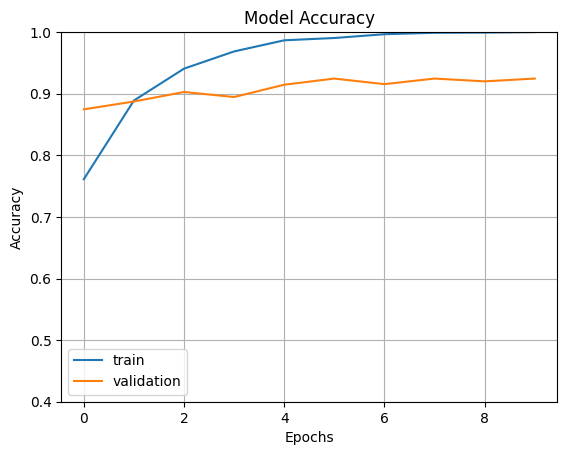

In [19]:
#evaluate the model 
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

In [22]:
#predicting
import cv2
image = cv2.imread(str(roses[0]))
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis = 0)
print(image.shape)

pred = resnet_model.predict(image)
output_class = class_names[np.argmax(pred)]
print("The predicted class is ", output_class)

(1, 180, 180, 3)
1/1 [==============================] - 2s 2s/step
The predicted class is  roses
